In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns
# Reading the loan prediction csv file 
train_data = pd.read_csv("Train.csv", low_memory = False)

# Reading the Holdout testing file
test_data = pd.read_csv("Test.csv", low_memory = False)

# Displaying the Loan prediction train data
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


5 rows x 14 column

In [5]:
# Displaying the Holdout testing file
test_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [6]:
train_data.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


5 rows x 13 column

<AxesSubplot:>

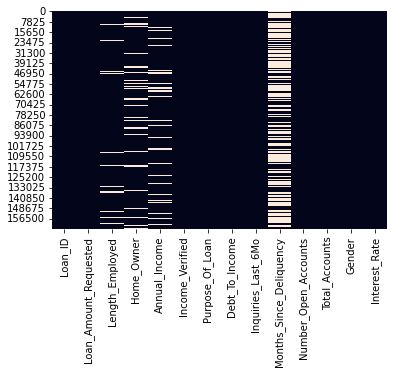

In [7]:
# Checking the null values in our train dataset through heat map

import seaborn as sns
sns.heatmap(train_data.isnull(), cbar=False)

<AxesSubplot:>

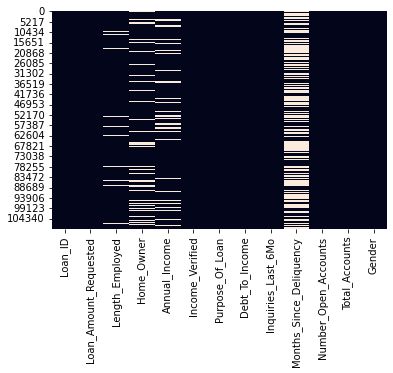

In [8]:
# Checking the null values in our test dataset through heat map

import seaborn as sns
sns.heatmap(test_data.isnull(), cbar=False)

In [9]:
# Creating a function to find the missing values in columns
def missing_values_table(df):
    
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
# Call the above function and passing the train dataset as parameter
missing_values_table(train_data)

Your selected dataframe has 14 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Months_Since_Deliquency,88379,53.8
Home_Owner,25349,15.4
Annual_Income,25102,15.3
Length_Employed,7371,4.5


In [11]:
# Call the above function and passing the train dataset as parameter
missing_values_table(test_data)

Your selected dataframe has 13 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Months_Since_Deliquency,58859,53.7
Annual_Income,16898,15.4
Home_Owner,16711,15.3
Length_Employed,4936,4.5


Now, its time for some data cleaning. Before handling the missing values we will first remove the unwanted columns from our dataset which does not provide any insights. We will closely observe each columns and make decisions to remove or not.

From the above table we can see that there is one column having more than 50% of missing values. We can simply drop these columns as they do not bring any valuable information.

We can see from above, our original dataset dimension have reduced. There are other columns as well which are not relevant and did not give much information. We will remove those columns as well.

Loan_Id - It is a unique id. Dropping it.

In [12]:
# Removing the columns with up to 50% null and Loan_ID from our train dataset and renaming our new dataset
drop_cols = ['Loan_ID', 'Months_Since_Deliquency']
cleaned_train = train_data.drop(drop_cols, axis = 1)

# Removing the same columns on my test dataset and renaming it.
cleaned_test = test_data.drop(drop_cols, axis = 1)

#Checking the cleaned train file
cleaned_train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [13]:
#Checking the cleaned test file
cleaned_test.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,10,37,Male
1,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,6,23,Male
2,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,5,20,Male
3,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,6,8,Male
4,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,9,21,Male


In [14]:
# Finding the number of null values in each column
null_counts = cleaned_train.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Loan_Amount_Requested        0
Length_Employed           7371
Home_Owner               25349
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64


In [15]:
# Finding the number of null values in each column
null_counts = cleaned_test.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Loan_Amount_Requested        0
Length_Employed           4936
Home_Owner               16711
Annual_Income            16898
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
dtype: int64


In [16]:
# Checking value counts before filling NA
cleaned_train['Home_Owner'].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [17]:
# Checking value counts before filling NA
cleaned_test['Home_Owner'].value_counts()

Mortgage    46925
Rent        37511
Own          8354
Other          30
None           10
Name: Home_Owner, dtype: int64

Filling the NA values in column 'Home_Owner' with Mortgage as it is the higher frequency variable in the column.

In [18]:
# Filling NA with Mortgage
cleaned_train['Home_Owner'] = cleaned_train['Home_Owner'].fillna('Mortgage')
cleaned_test['Home_Owner'] = cleaned_test['Home_Owner'].fillna('Mortgage')

# Checking value counts after filling NA
cleaned_train['Home_Owner'].value_counts()

Mortgage    95694
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [19]:
# Filling NA values with median
cleaned_train['Annual_Income'] = cleaned_train['Annual_Income'].fillna(value=cleaned_train["Annual_Income"].mean())
cleaned_test['Annual_Income'] = cleaned_test['Annual_Income'].fillna(value=cleaned_test["Annual_Income"].mean())

In [20]:
# Checking value counts before filling NA
cleaned_train['Length_Employed'].value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

Cleaning the 'Length_Employed' by replacing less than 1year to 0.5 because it is the minimum requirement to apply for a loan. Moreover, removing years, year and + sign from the column and filling our NA values with the mean because the average interest rate for less than 1 year and 1 year is same.

In [21]:
# Cleaning the train file
cleaned_train['Length_Employed'] = cleaned_train['Length_Employed'].str.replace('< 1 year','0.5').str.replace('years', '').str.replace('year', '').str.replace('+','')

# Cleaing the test file
cleaned_test['Length_Employed'] = cleaned_test['Length_Employed'].str.replace('< 1 year','0.5').str.replace('years', '').str.replace('year', '').str.replace('+','')

cleaned_train.head()

C:\Users\W@rdis\AppData\Local\Temp\ipykernel_1616\3471789867.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cleaned_train['Length_Employed'] = cleaned_train['Length_Employed'].str.replace('< 1 year','0.5').str.replace('years', '').str.replace('year', '').str.replace('+','')
C:\Users\W@rdis\AppData\Local\Temp\ipykernel_1616\3471789867.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cleaned_test['Length_Employed'] = cleaned_test['Length_Employed'].str.replace('< 1 year','0.5').str.replace('years', '').str.replace('year', '').str.replace('+','')


,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,"7,000",0.5,Rent,68000.000000,not verified,car,18.37,0,9,14,Female,1
1,"30,000",4,Mortgage,73331.159434,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,"24,725",7,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,"16,000",0.5,Mortgage,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,"17,000",8,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [22]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_Amount_Requested  164309 non-null  object 
 1   Length_Employed        156938 non-null  object 
 2   Home_Owner             164309 non-null  object 
 3   Annual_Income          164309 non-null  float64
 4   Income_Verified        164309 non-null  object 
 5   Purpose_Of_Loan        164309 non-null  object 
 6   Debt_To_Income         164309 non-null  float64
 7   Inquiries_Last_6Mo     164309 non-null  int64  
 8   Number_Open_Accounts   164309 non-null  int64  
 9   Total_Accounts         164309 non-null  int64  
 10  Gender                 164309 non-null  object 
 11  Interest_Rate          164309 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 15.0+ MB


In [23]:
cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_Amount_Requested  109541 non-null  object 
 1   Length_Employed        104605 non-null  object 
 2   Home_Owner             109541 non-null  object 
 3   Annual_Income          109541 non-null  float64
 4   Income_Verified        109541 non-null  object 
 5   Purpose_Of_Loan        109541 non-null  object 
 6   Debt_To_Income         109541 non-null  float64
 7   Inquiries_Last_6Mo     109541 non-null  int64  
 8   Number_Open_Accounts   109541 non-null  int64  
 9   Total_Accounts         109541 non-null  int64  
 10  Gender                 109541 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 9.2+ MB


In [24]:
# Cleaning the train file
cleaned_train['Loan_Amount_Requested'] = cleaned_train['Loan_Amount_Requested'].str.replace(',','')
cleaned_test['Loan_Amount_Requested'] = cleaned_test['Loan_Amount_Requested'].str.replace(',','')

In [25]:
# Changing the dataype of Objects to float, str and int accordingly in train file
cleaned_train['Loan_Amount_Requested'] = cleaned_train['Loan_Amount_Requested'].astype(int)
cleaned_train['Length_Employed'] = cleaned_train['Length_Employed'].astype(float)
cleaned_train['Income_Verified'] = cleaned_train['Income_Verified'].astype(str)
cleaned_train['Purpose_Of_Loan'] = cleaned_train['Purpose_Of_Loan'].astype(str)
cleaned_train['Gender'] = cleaned_train['Gender'].astype(str)
cleaned_train['Home_Owner'] = cleaned_train['Home_Owner'].astype(str)

# Changing the datatype of Objects to float, str and int accordingly in test file
cleaned_test['Loan_Amount_Requested'] = cleaned_test['Loan_Amount_Requested'].astype(int)
cleaned_test['Length_Employed'] = cleaned_test['Length_Employed'].astype(float)
cleaned_test['Income_Verified'] = cleaned_test['Income_Verified'].astype(str)
cleaned_test['Purpose_Of_Loan'] = cleaned_test['Purpose_Of_Loan'].astype(str)
cleaned_test['Gender'] = cleaned_test['Gender'].astype(str)
cleaned_test['Home_Owner'] = cleaned_test['Home_Owner'].astype(str)

In [26]:
#Checking the cleaned train file
cleaned_train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,0.5,Rent,68000.000000,not verified,car,18.37,0,9,14,Female,1
1,30000,4.0,Mortgage,73331.159434,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,24725,7.0,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,16000,0.5,Mortgage,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,17000,8.0,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [27]:
# Filling NA values of Length_Employed column with mean in train file
cleaned_train['Length_Employed'] = cleaned_train['Length_Employed'].fillna(value=cleaned_train["Length_Employed"].mean())

# Filling NA values of Length_Employed column with mean in test file
cleaned_test['Length_Employed'] = cleaned_test['Length_Employed'].fillna(value=cleaned_test["Length_Employed"].mean())

In [28]:
# instatiate sklearn's labelencoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Encoding the categorical values in train file
cleaned_train['Income_Verified'] = le.fit_transform(cleaned_train['Income_Verified'])
cleaned_train['Purpose_Of_Loan'] = le.fit_transform(cleaned_train['Purpose_Of_Loan'])
cleaned_train['Gender'] = le.fit_transform(cleaned_train['Gender'])
cleaned_train['Home_Owner'] = le.fit_transform(cleaned_train['Home_Owner'])


# Encoding the categorical values in train file
cleaned_test['Income_Verified'] = le.fit_transform(cleaned_test['Income_Verified'])
cleaned_test['Purpose_Of_Loan'] = le.fit_transform(cleaned_test['Purpose_Of_Loan'])
cleaned_test['Gender'] = le.fit_transform(cleaned_test['Gender'])
cleaned_test['Home_Owner'] = le.fit_transform(cleaned_test['Home_Owner'])

cleaned_train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,0.5,4,68000.000000,2,0,18.37,0,9,14,0,1
1,30000,4.0,0,73331.159434,0,2,14.93,0,12,24,0,3
2,24725,7.0,0,75566.400000,1,2,15.88,0,12,16,1,3
3,16000,0.5,0,56160.000000,1,2,14.34,3,16,22,1,3
4,17000,8.0,3,96000.000000,1,2,22.17,1,19,30,0,1


In [29]:
# Finding null values in our cleaned train file
null_counts = cleaned_train.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

# Finding null values in our cleaned test file
null_counts = cleaned_test.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64
Number of null values in each column:
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
dtype: int64


In [30]:
cleaned_train['Loan_Amount_Requested']

0          7000
1         30000
2         24725
3         16000
4         17000
          ...  
164304    20725
164305     6000
164306    20250
164307    10000
164308     9250
Name: Loan_Amount_Requested, Length: 164309, dtype: int32

In [31]:
# Assigning our cleaned train file to a new variable
cleaned_train_data = cleaned_train

# Checking the datatypes of all our columns.
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_Amount_Requested  164309 non-null  int32  
 1   Length_Employed        164309 non-null  float64
 2   Home_Owner             164309 non-null  int32  
 3   Annual_Income          164309 non-null  float64
 4   Income_Verified        164309 non-null  int32  
 5   Purpose_Of_Loan        164309 non-null  int32  
 6   Debt_To_Income         164309 non-null  float64
 7   Inquiries_Last_6Mo     164309 non-null  int64  
 8   Number_Open_Accounts   164309 non-null  int64  
 9   Total_Accounts         164309 non-null  int64  
 10  Gender                 164309 non-null  int32  
 11  Interest_Rate          164309 non-null  int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 11.9 MB


In [32]:
# Assigning our cleaned test file to a new variable
cleaned_test_data = cleaned_test

cleaned_test_data

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,27500,10.0,0,129000.0,0,2,12.87,0,10,37,1
1,26000,10.0,0,110000.0,2,1,11.37,0,6,23,1
2,6075,0.5,4,75000.0,0,2,6.83,2,5,20,1
3,12000,10.0,0,73000.0,1,2,7.76,0,6,8,1
4,35000,0.5,0,156000.0,2,2,9.62,0,9,21,1
...,...,...,...,...,...,...,...,...,...,...,...
109536,15000,9.0,0,120000.0,0,9,8.15,2,13,57,1
109537,9600,10.0,0,125000.0,2,1,9.08,1,9,34,1
109538,2000,5.0,4,37850.0,2,1,11.60,0,10,11,1
109539,2125,6.0,4,30000.0,2,9,24.88,0,5,6,1


Modelling
Lets, first extract the target variable that is "Interest rate" from the table and our predictors from the train data

In [33]:
# Extracting the target variable
y = cleaned_train_data['Interest_Rate']


# Removing the interest column
x = cleaned_train_data.drop(['Interest_Rate'], axis = 1)

We will split our data into 80% for our training and remaining 20% for testing.

In [34]:
import sklearn.model_selection as cv
x_train, x_test, y_train, y_test = cv.train_test_split(x, y, test_size=.20)

Decision Tree

In [37]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=11)
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.502099689611101

Random Forest

In [38]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(max_depth=11)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.5190493579210029

In [39]:
y_pred = rf.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 859, 4958, 1021],
       [ 608, 9611, 3884],
       [ 142, 5192, 6587]], dtype=int64)

Apply to data test

In [40]:
# Using the Random Forest to predict our cleaned test data
import numpy as np
y_pred = rf.predict(cleaned_test_data)
Interest_Rate = np.array(y_pred)
cleaned_test_data['Interest_Rate'] = y_pred.tolist()

In [41]:
cleaned_test_data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,27500,10.0,0,129000.0,0,2,12.87,0,10,37,1,2
1,26000,10.0,0,110000.0,2,1,11.37,0,6,23,1,1
2,6075,0.5,4,75000.0,0,2,6.83,2,5,20,1,3
3,12000,10.0,0,73000.0,1,2,7.76,0,6,8,1,2
4,35000,0.5,0,156000.0,2,2,9.62,0,9,21,1,2


In [42]:
cleaned_train_data.to_csv("Final_Train_Data.csv")
cleaned_test_data.to_csv("Final_Test_Data.csv")